In [18]:
try:
    import july
except ModuleNotFoundError:
    !pip install july

import numpy as np
import matplotlib.pyplot as plt

from july.utils import date_range
import urllib.request, json 

import datetime

current_year = datetime.date.today().year

In [53]:
def get_btage(year, state):
    ## Select one of the German states
    ## "bw","by","be","bb","hb","hh","he","mv","ni","nw","rp","sl","sn","st","sh","th"
    dates = date_range(f"{year}-01-01", f"{year}-12-31")
    data = np.full(len(dates), 5)

    with urllib.request.urlopen(f"https://get.api-feiertage.de/?years={year}&states={state}") as url:
        fdata = json.loads(url.read().decode())
    
    for holiday in fdata['feiertage']:
        print(holiday['date'], holiday['fname'])
        date_time_obj = datetime.datetime.strptime(holiday['date'], '%Y-%m-%d')
        # get the day of year representation and color in the holidays
        day_of_year = date_time_obj.timetuple().tm_yday
        data[day_of_year-1] = 15
        # check for Brückentage
        # holiday is a Thursday
        if date_time_obj.weekday() == 3:
            if not data[day_of_year] == 15:
                data[day_of_year] = 10
        # holiday is a Tuesday
        if date_time_obj.weekday() == 1:
            if not data[day_of_year-2] == 15:
                data[day_of_year-2] = 10
    return dates, data

In [54]:
dates, data = get_btage(current_year, 'he')

2022-01-01 Neujahr
2022-04-15 Karfreitag
2022-04-18 Ostermontag
2022-05-01 Tag der Arbeit
2022-05-26 Christi Himmelfahrt
2022-06-06 Pfingstmontag
2022-06-16 Fronleichnam
2022-10-03 Tag der deutschen Einheit
2022-12-25 1. Weihnachtstag
2022-12-26 2. Weihnachtstag


<AxesSubplot:title={'center':'Brückentage'}>

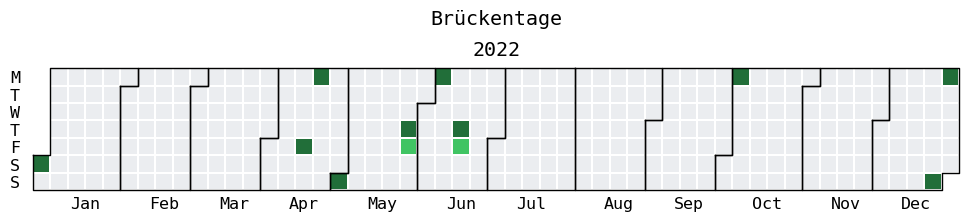

In [56]:
july.heatmap(dates, data, title='Brückentage', cmap="github", month_grid=True )

2022-01-01 Neujahr
2022-04-15 Karfreitag
2022-04-18 Ostermontag
2022-05-01 Tag der Arbeit
2022-05-26 Christi Himmelfahrt
2022-06-06 Pfingstmontag
2022-06-16 Fronleichnam
2022-10-03 Tag der deutschen Einheit
2022-12-25 1. Weihnachtstag
2022-12-26 2. Weihnachtstag
2023-01-01 Neujahr
2023-04-07 Karfreitag
2023-04-10 Ostermontag
2023-05-01 Tag der Arbeit
2023-05-18 Christi Himmelfahrt
2023-05-29 Pfingstmontag
2023-06-08 Fronleichnam
2023-10-03 Tag der deutschen Einheit
2023-12-25 1. Weihnachtstag
2023-12-26 2. Weihnachtstag
2024-01-01 Neujahr
2024-03-29 Karfreitag
2024-04-01 Ostermontag
2024-05-01 Tag der Arbeit
2024-05-09 Christi Himmelfahrt
2024-05-20 Pfingstmontag
2024-05-30 Fronleichnam
2024-10-03 Tag der deutschen Einheit
2024-12-25 1. Weihnachtstag
2024-12-26 2. Weihnachtstag


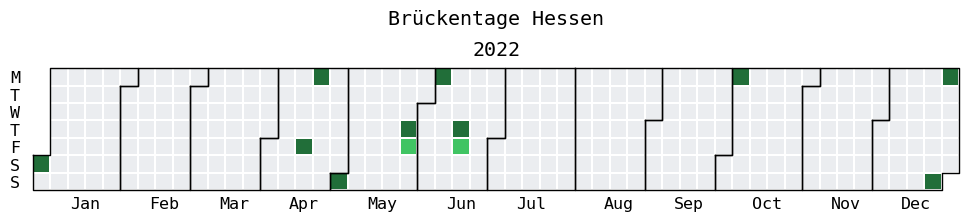

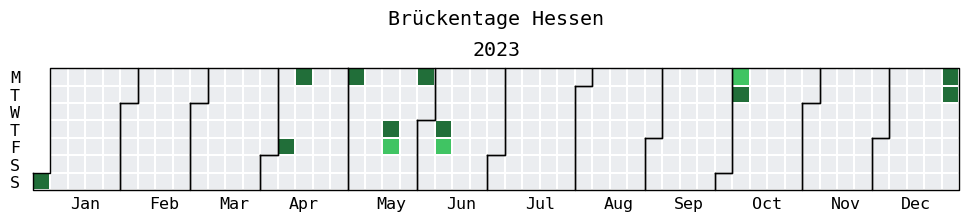

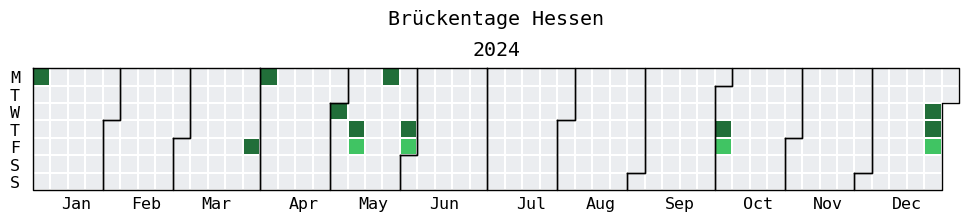

In [64]:
for y in range(current_year, current_year+3):
    dates, data = get_btage(y, 'he')
    july.heatmap(dates, data, title='Brückentage Hessen', cmap="github", month_grid=True)